In [367]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [368]:
tqqq = pd.read_csv('./data/stock/tqqq/TQQQ.csv')
qqq = pd.read_csv('./data/stock/qqq/QQQ.csv')

time_window = 30
stock = tqqq.iloc[-365*8:]

In [369]:
stock = stock.set_index('Date')
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-22,88.290001,92.870003,88.290001,91.089996,91.089996,35275300
2021-03-23,92.050003,93.230003,89.169998,89.900002,89.900002,46945200
2021-03-24,91.089996,91.120003,85.250000,85.360001,85.360001,47620900
2021-03-25,83.820000,86.180000,81.650002,84.900002,84.900002,59968600
2021-03-26,84.720001,88.970001,83.529999,88.650002,88.650002,53680500


In [370]:
feature = stock.columns
predict_column_name = 'Close'
predict_date_delta = 1 # predict next day
stock = stock[feature]
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000
2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800
2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600
2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400
2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400
...,...,...,...,...,...,...
2021-03-22,88.290001,92.870003,88.290001,91.089996,91.089996,35275300
2021-03-23,92.050003,93.230003,89.169998,89.900002,89.900002,46945200
2021-03-24,91.089996,91.120003,85.250000,85.360001,85.360001,47620900


In [371]:
train_data = stock.iloc[:int(len(stock)/4 * 3)]

In [372]:
test_data = stock.iloc[int(len(stock) /4 * 3):]

In [373]:
train_data.shape

(2100, 6)

In [374]:
test_data.shape

(700, 6)

In [375]:
from sklearn import preprocessing

In [376]:
sc = preprocessing.StandardScaler()
train_data_scaled = sc.fit_transform(train_data.values)

In [377]:
train_data_scaled

array([[-0.94420732, -0.93780769, -0.94257658, -0.93688703, -0.93679734,
        -1.68473972],
       [-0.94023294, -0.93691399, -0.93886365, -0.93638106, -0.93629163,
        -1.55703411],
       [-0.93344536, -0.93294355, -0.93327163, -0.93157471, -0.9314876 ,
        -1.5317789 ],
       ...,
       [ 3.28784865,  3.28104956,  3.35270979,  3.33718139,  3.3371201 ,
        -1.17675651],
       [ 3.35500996,  3.36544019,  3.38689898,  3.33218162,  3.33212054,
        -0.87398183],
       [ 3.39645007,  3.41677782,  3.46473361,  3.46574658,  3.46567954,
        -0.64806481]])

In [378]:
x_train = []
y_train = []

for i in range(time_window, len(train_data_scaled) + 1 - predict_date_delta):
    x_train.append(train_data_scaled[i-time_window:i])
    y_train.append(train_data_scaled[i + predict_date_delta - 1])

x_train, y_train = np.array(x_train), np.array(y_train)

In [379]:
x_train.shape

(2070, 30, 6)

In [380]:
y_train.shape

(2070, 6)

In [381]:
x_train

array([[[-0.94420732, -0.93780769, -0.94257658, -0.93688703,
         -0.93679734, -1.68473972],
        [-0.94023294, -0.93691399, -0.93886365, -0.93638106,
         -0.93629163, -1.55703411],
        [-0.93344536, -0.93294355, -0.93327163, -0.93157471,
         -0.9314876 , -1.5317789 ],
        ...,
        [-0.8963816 , -0.89600803, -0.89609709, -0.8941212 ,
         -0.89405217, -1.08385624],
        [-0.8952653 , -0.89716544, -0.89464223, -0.89648709,
         -0.89641697, -0.66309484],
        [-0.89245195, -0.89301919, -0.89476342, -0.8975139 ,
         -0.89744328, -0.6049602 ]],

       [[-0.94023294, -0.93691399, -0.93886365, -0.93638106,
         -0.93629163, -1.55703411],
        [-0.93344536, -0.93294355, -0.93327163, -0.93157471,
         -0.9314876 , -1.5317789 ],
        [-0.92982837, -0.93105348, -0.9295587 , -0.92938739,
         -0.9293013 , -1.29447519],
        ...,
        [-0.8952653 , -0.89716544, -0.89464223, -0.89648709,
         -0.89641697, -0.66309484],
  

In [382]:
y_train

array([[-0.89516112, -0.89577356, -0.896385  , -0.89666565, -0.89659546,
        -0.72456508],
       [-0.89416385, -0.8949824 , -0.89271761, -0.89441876, -0.89434961,
        -1.2982873 ],
       [-0.89301768, -0.89351724, -0.89317225, -0.89267784, -0.89260947,
        -1.27541465],
       ...,
       [ 3.28784865,  3.28104956,  3.35270979,  3.33718139,  3.3371201 ,
        -1.17675651],
       [ 3.35500996,  3.36544019,  3.38689898,  3.33218162,  3.33212054,
        -0.87398183],
       [ 3.39645007,  3.41677782,  3.46473361,  3.46574658,  3.46567954,
        -0.64806481]])

In [383]:
model = tf.keras.models.Sequential()

# first LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window, activation='relu', return_sequences=True, input_shape=(time_window, len(feature))))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window + 20, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window + 40, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(len(feature)))

In [384]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 30, 30)            4440      
_________________________________________________________________
dropout_40 (Dropout)         (None, 30, 30)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 30, 30)            7320      
_________________________________________________________________
dropout_41 (Dropout)         (None, 30, 30)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 30, 50)            16200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 70)              

In [385]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [386]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/20
65/65 [==============================] - 7s 39ms/step - loss: 0.6250
Epoch 2/20
65/65 [==============================] - 2s 37ms/step - loss: 0.2803
Epoch 3/20
65/65 [==============================] - 3s 44ms/step - loss: 0.2600
Epoch 4/20
65/65 [==============================] - 3s 41ms/step - loss: 0.2437
Epoch 5/20
65/65 [==============================] - 3s 48ms/step - loss: 0.2397
Epoch 6/20
65/65 [==============================] - 3s 44ms/step - loss: 0.2203
Epoch 7/20
65/65 [==============================] - 3s 45ms/step - loss: 0.2057
Epoch 8/20
65/65 [==============================] - 3s 46ms/step - loss: 0.2080
Epoch 9/20
65/65 [==============================] - 3s 47ms/step - loss: 0.2069
Epoch 10/20
65/65 [==============================] - 3s 51ms/step - loss: 0.1934
Epoch 11/20
65/65 [==============================] - 3s 48ms/step - loss: 0.1918
Epoch 12/20
65/65 [==============================] - 2s 33ms/step - loss: 0.1987
Epoch 13/20
65/65 [==================

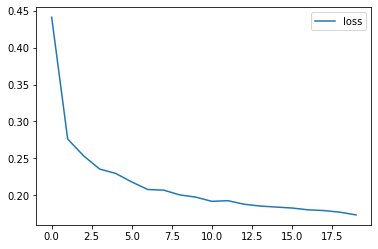

In [387]:
pd.DataFrame(history.history).plot()

In [388]:
# Prediction based on last time frame real stock value

dataset_total = pd.concat((train_data, test_data), axis = 0)

inputs = dataset_total[len(dataset_total) - len(test_data) - time_window:].values

inputs = sc.fit_transform(inputs)

x_test = []
for i in range(time_window, len(test_data) + time_window):
    x_test.append(inputs[i-time_window:i])

x_test = np.array(x_test)
x_test.shape

(700, 30, 6)

In [389]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.columns = feature

In [390]:
predicted_stock

,Open,High,Low,Close,Adj Close,Volume
0,28.366524,29.180241,27.901436,28.716236,28.564545,26068226.0
1,28.545158,29.359928,28.079351,28.896191,28.736856,26151892.0
2,28.725098,29.540215,28.257681,29.076609,28.910450,26265572.0
3,28.905893,29.720318,28.435175,29.256433,29.083448,26428338.0
4,29.093567,29.906672,28.618631,29.442217,29.263760,26614026.0
...,...,...,...,...,...,...
695,87.458122,89.554077,85.165253,86.693169,87.881508,32277960.0
696,86.768440,88.839760,84.471321,86.001953,87.157700,31728490.0
697,86.122116,88.165718,83.822052,85.349869,86.488464,31250800.0
698,85.567986,87.581490,83.263802,84.784111,85.921112,30869686.0


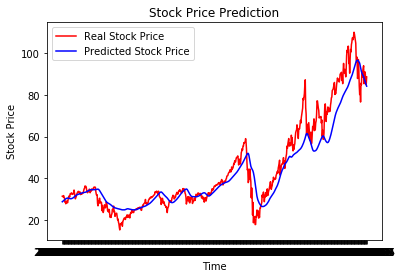

In [391]:
real_stock_price = test_data.iloc[predict_date_delta-1:, test_data.columns.get_loc(predict_column_name)]
predicted_stock_price = predicted_stock.loc[:, predict_column_name]

# plot
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [392]:
# Predict next day
inputs = stock[-time_window:].values

inputs = sc.fit_transform(inputs)

x_test = np.array(inputs)
x_test = np.reshape(x_test, (-1, time_window, len(feature)))
x_test.shape

(1, 30, 6)

In [395]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.columns = feature

In [396]:
predicted_stock

,Open,High,Low,Close,Adj Close,Volume
0,88.827393,91.471931,85.20137,88.14608,88.134178,42635756.0
